In [ ]:
#!pip uninstall  llvmlite --yes

In [1]:
import mysql.connector
import csv
import pymysql
import pandas as pd
import numpy as np
import pandas_profiling
from pymysql import Error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
try:
        mysqldb = pymysql.connect(
            host="cpanel.insaid.co",
            user="student",
            passwd="student",
           database='Capstone2'
       )
        cursor = mysqldb.cursor()
        db_Info = mysqldb.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor.execute("select database();")
        record = cursor.fetchone()
        
        listOfDepartment=[]
        cursor.execute("select * from department_data")
        print(cursor.description)
        field_names = [i[0] for i in cursor.description]
        print(field_names)
        deptInfo = cursor.fetchall()
        for each_row in deptInfo:
            listOfDepartment.append(each_row)
        deptInfo = pd.DataFrame(listOfDepartment,columns =field_names)
        
        listOfEmployees = []       
        cursor.execute("select * from employee_details_data")
        employeeInfo = cursor.fetchall()
        device_field = [i[0] for i in cursor.description]
        for each_row1 in employeeInfo:
            listOfEmployees.append(each_row1)
        employeeInfo = pd.DataFrame(listOfEmployees, columns = device_field)
        print("You're connected to database: ", record)
        
        listOfEmployeeData = []       
        cursor.execute("select * from employee_data")
        employeeDataInfo = cursor.fetchall()
        device_field = [i[0] for i in cursor.description]
        for each_row1 in employeeDataInfo:
            listOfEmployeeData.append(each_row1)
        employeeDataInfo = pd.DataFrame(listOfEmployeeData, columns = device_field)
        print("You're connected to database: ", record)
        

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
        mysqldb.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  5.6.49-cll-lve
(('dept_id', 253, None, 80, 80, 0, True), ('dept_name', 253, None, 200, 200, 0, True), ('dept_head', 253, None, 400, 400, 0, True))
['dept_id', 'dept_name', 'dept_head']
You're connected to database:  ('Capstone2',)
You're connected to database:  ('Capstone2',)
MySQL connection is closed


In [4]:
print(employeeInfo)

       employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]


In [5]:
print(deptInfo.shape)

(11, 3)


In [8]:
print(employeeDataInfo.shape)


(14150, 11)


In [7]:
employeeDataInfo.to_excel ('Employee-Data.xlsx', index = False, header=True)

In [100]:
employeeDataInfo =pd.read_excel('Employee-Data.xlsx', index_col=None)  
#print(employeeDataInfo)

In [ ]:
profile = ProfileReport(employeeInfo)
profile.to_file('employeeInfo.html')

In [ ]:
profile = ProfileReport(deptInfo)
profile.to_file('deptInfo.html')

In [ ]:
profile = ProfileReport(employeeDataInfo)
profile.to_file('employeeDataInfo.html')

# Joining All three tables 

In [101]:
employeeDataInfo.drop(employeeDataInfo[employeeDataInfo['employee_id']==0].index,inplace=True)

In [102]:
#employeeDataInfo.drop(employeeDataInfo[employeeDataInfo['employee_id']].index,inplace=True)
employeeDataInfo.drop_duplicates(subset='employee_id', keep='first', inplace=True)

In [103]:
employeeDataInfo.drop(employeeDataInfo[employeeDataInfo['department']=='D00-TP'].index,inplace=True)

In [104]:
employeeDataInfo["department"]= employeeDataInfo["department"].replace('-IT', "D00-IT") 

In [105]:
cols = ['employee_id']
employeeDataDetailsInfo = employeeDataInfo.merge(employeeInfo, on='employee_id', how='left')

In [106]:
#print(len(employeeDataDetailsInfo))
print(len(employeeDataInfo))

13966


In [107]:
employeeDataDetailsInfo['last_evaluation'] = employeeDataDetailsInfo['last_evaluation'].fillna((employeeDataDetailsInfo['last_evaluation'].mean()))

In [108]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(missing_values=np.nan, strategy='most_frequent')

# For gender
imputer = imputer.fit(employeeDataDetailsInfo["department"]) 
employeeDataDetailsInfo["department"] = imputer.transform(employeeDataDetailsInfo["department"]) 

In [109]:
deptInfo.rename(columns = {'dept_id':'department'}, inplace = True)

In [110]:
cols = ['department']
emp_details_data_dept = employeeDataDetailsInfo.join(deptInfo.set_index(cols), on=cols)

In [111]:
emp_details_data_dept.head()
print(len(emp_details_data_dept))

13966


In [112]:
# Make a back up of the final superset of datasets with NaNs 
Emp_copy = emp_details_data_dept.copy()

In [113]:
Emp_copy.to_csv ("Emp_Copy.csv",index=None)

In [114]:
emp_details_data_dept = pd.read_csv("Emp_Copy.csv",index_col=None)

In [115]:
Emp_copy.isnull().sum().sort_values(ascending = False)

recently_promoted    13669
filed_complaint      11954
dept_head                0
dept_name                0
marital_status           0
gender                   0
age                      0
employee_id              0
tenure                   0
status                   0
satisfaction             0
salary                   0
n_projects               0
last_evaluation          0
department               0
avg_monthly_hrs          0
dtype: int64

In [116]:
print(deptInfo)

   department    dept_name              dept_head
0      D00-IT           IT             Henry Adey
1      D00-SS        Sales        Edward J Bayley
2      D00-TP         Temp        Micheal Zachrey
3     D00-ENG  Engineering  Sushant Raghunathan K
4      D00-SP      Support         Amelia Westray
5      D00-FN      Finance              Aanchal J
6      D00-PR  Procurement            Louie Viles
7      D00-AD        Admin          Evelyn Tolson
8      D00-MN   Management          Ellie Trafton
9      D00-MT    Marketing           Reuben Swann
10     D00-PD      Product          Darcy Staines


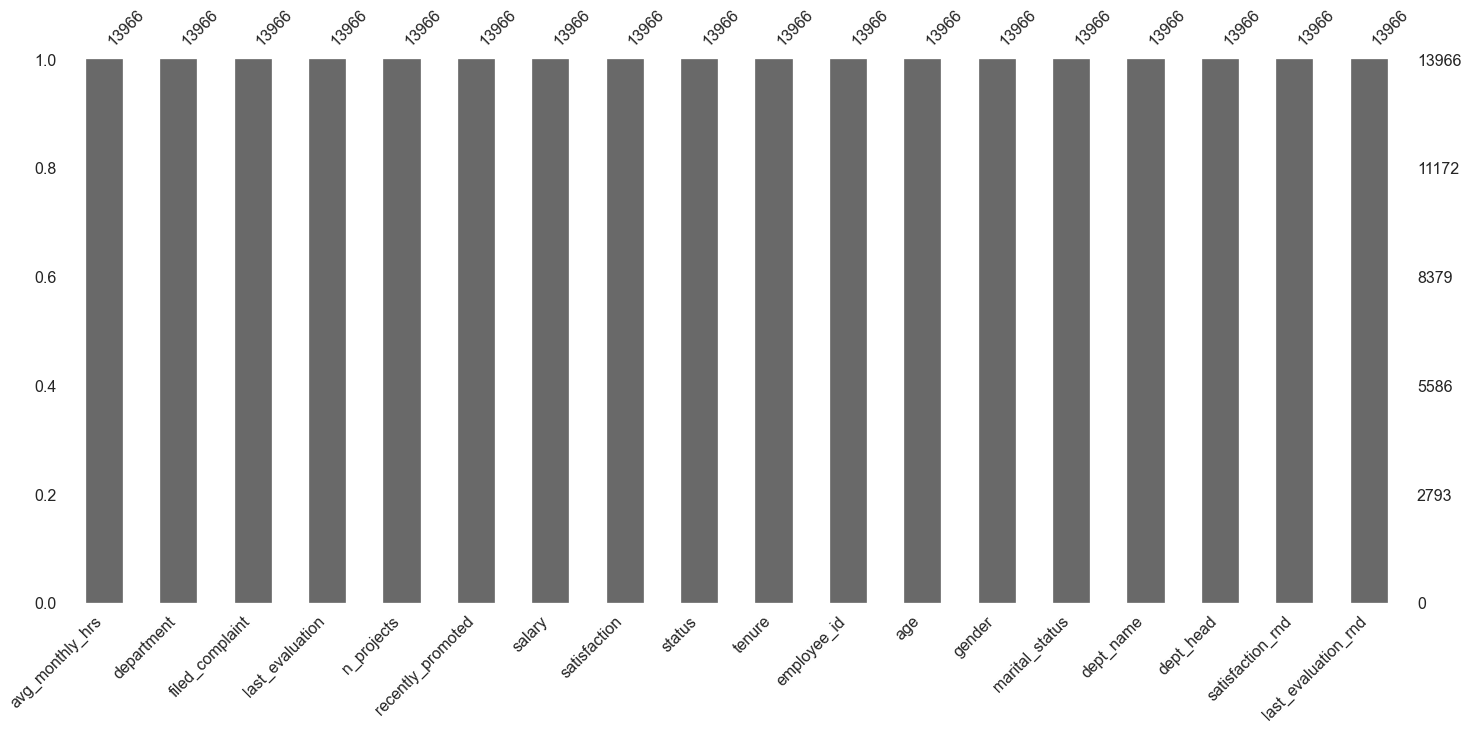

In [333]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno
msno.bar(emp_details_data_dept)

# Changing Data type of avg_monthly_hrs to float 

In [117]:
emp_details_data_dept["avg_monthly_hrs"] = emp_details_data_dept.avg_monthly_hrs.astype(float)
emp_details_data_dept["tenure"] = emp_details_data_dept.tenure.astype(float)
emp_details_data_dept["filed_complaint"] = emp_details_data_dept.filed_complaint.astype(float)

In [118]:
emp_details_data_dept.salary.replace({'low':1, 'medium':2, 'high':3}, inplace=True)
emp_details_data_dept.status.replace({'Left':1, 'Employed':0}, inplace=True)
emp_details_data_dept.marital_status.replace({'Unmarried':0, 'Married':1}, inplace=True)
emp_details_data_dept.gender.replace({'Male':0, 'Female':1}, inplace=True)


In [119]:
def get_feature_groups():
   
    # Numerical Features
    num_features = emp_details_data_dept.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['employee_id'],1) # drop ID and SalePrice

    # Categorical Features
    cat_features = emp_details_data_dept.select_dtypes(include=['object']).columns
    return num_features.to_list(), cat_features.to_list()

num_features, cat_features = get_feature_groups()
print(' num_features ',num_features)
print(' cat_features ',cat_features)

num_features, cat_features = get_feature_groups()

 num_features  ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure', 'age', 'gender', 'marital_status']
 cat_features  ['department', 'dept_name', 'dept_head']


# Replacing filed_complaint, recently_promoted null value with 0

In [120]:
emp_details_data_dept["filed_complaint"] = emp_details_data_dept.filed_complaint.fillna(0)
emp_details_data_dept["recently_promoted"] = emp_details_data_dept.recently_promoted.fillna(0)

In [121]:
print(emp_details_data_dept.isnull().sum())

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_name            0
dept_head            0
dtype: int64


In [122]:
print(emp_details_data_dept.head())

   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  age  \
0                0.0       2      0.134415       0     4.0       124467   42   
1                0.0       1      0.511041       0     3.0       112210   23   
2                0.0       2      0.405101       0     3.0       126150   24   
3                0.0       1      0.152974       0     4.0       125346   51   
4                0.0       2      0.434845       0     3.0       113707   23   

   gender  marital_status dept_name        d

In [129]:
print(len(emp_details_data_dept[(emp_details_data_dept['marital_status']==0) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['marital_status']==0) & (emp_details_data_dept['status']==1)]))
print(len(emp_details_data_dept[(emp_details_data_dept['marital_status']==1) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['marital_status']==1) & (emp_details_data_dept['status']==1)]))

1928
5134
1407
5497


# EDA

<Figure size 1152x1440 with 0 Axes>

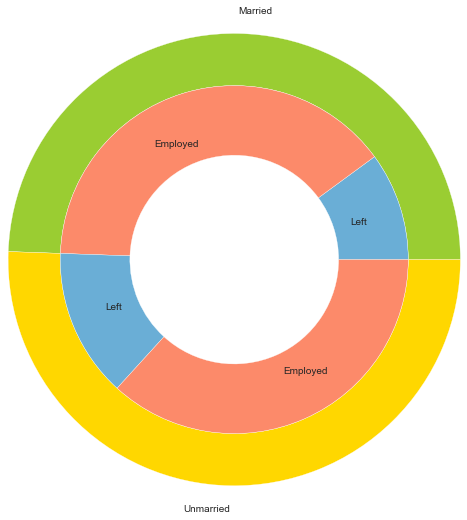

In [135]:
from matplotlib.pyplot import figure
figure(figsize=(16,20))

# Make data: 
group_names=['Married', 'Unmarried']
group_size=[6904,7062]
subgroup_names=['Left','Employed','Left','Employed']
subgroup_size=[1407,5497,1928,5134]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#plt.title('Donut plot')
# show it
plt.show()





In [148]:
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==1)]))
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==0) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==0) & (emp_details_data_dept['status']==1)]))
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==1) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['recently_promoted']==1) & (emp_details_data_dept['status']==1)]))

13669
297
3317
10352
18
279


<Figure size 1152x1440 with 0 Axes>

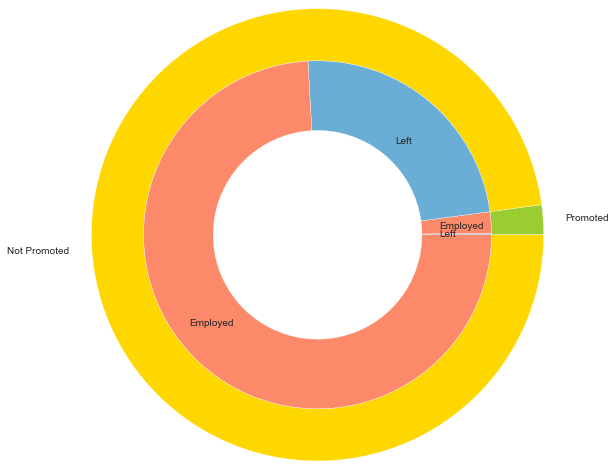

In [149]:
from matplotlib.pyplot import figure
figure(figsize=(16,20))

# Make data: 
group_names=['Promoted', 'Not Promoted']
group_size=[297,13669]
subgroup_names=['Left','Employed','Left','Employed']
subgroup_size=[18,279,3317,10352]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#plt.title('Donut plot')
# show it
plt.show()






In [ ]:
left = ((df['gender']=='male').sum() /len(df.index))*100
employed = ((df['gender']=='female').sum() /len(df.index))*100

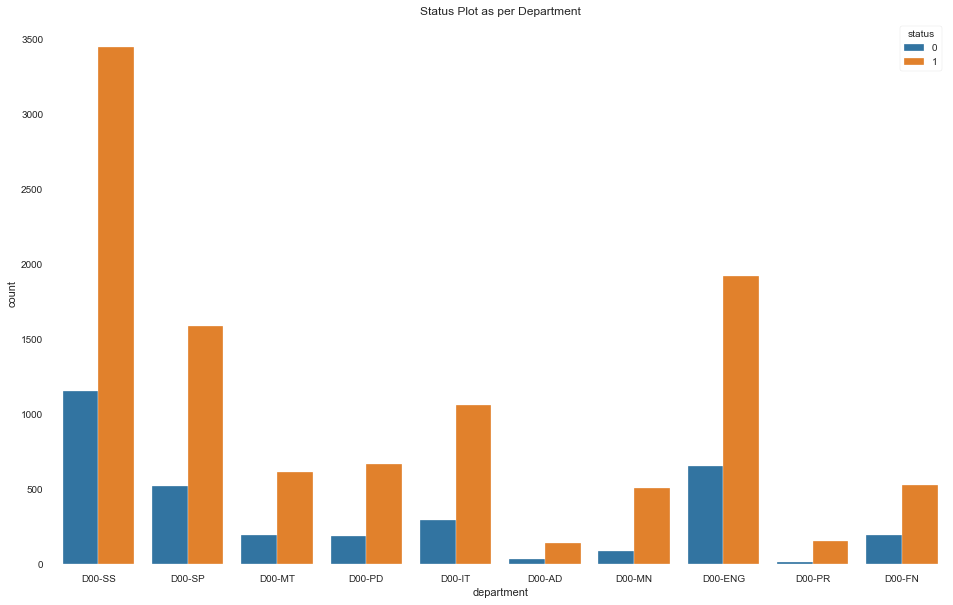

In [139]:
from matplotlib.pyplot import figure

figure(figsize=(16,10))
ax = sns.countplot(x='department',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure', 'age', 'gender', 'marital_status']


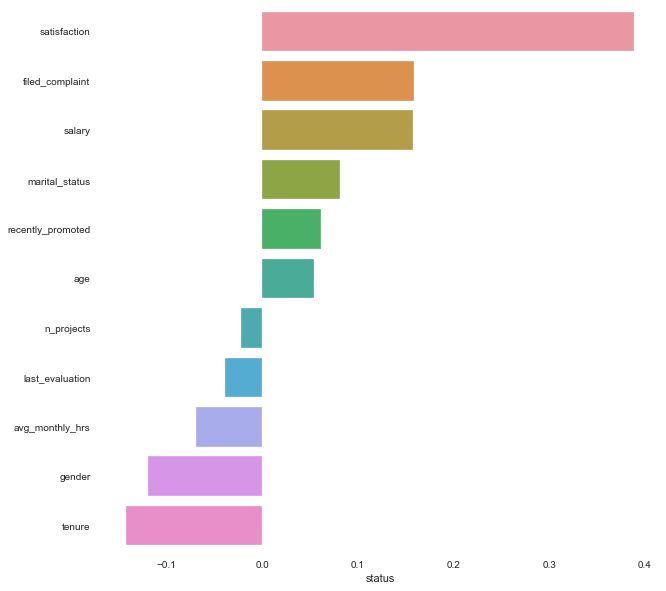

In [141]:
colu = num_features
print(colu)
corr = emp_details_data_dept[colu].corr()
corr = corr.sort_values('status', ascending=False)
#print(corr)
plt.figure(figsize=(10,10))
g=sns.barplot( corr.status[1:], corr.index[1:], orient='h')
#for index, row in corr.iterrows():
  #  g.text(color='black', ha="center")
plt.show()

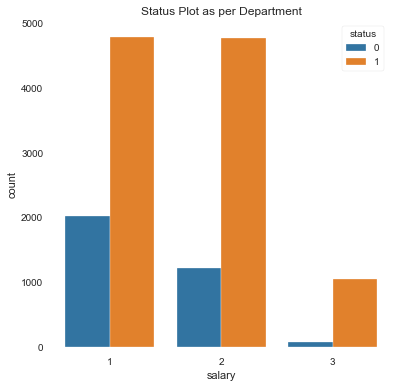

In [150]:
from matplotlib.pyplot import figure

figure(figsize=(6,6))
ax = sns.countplot(x='salary',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [146]:
print(emp_details_data_dept['age'].min())
print(emp_details_data_dept['age'].max())

22
57


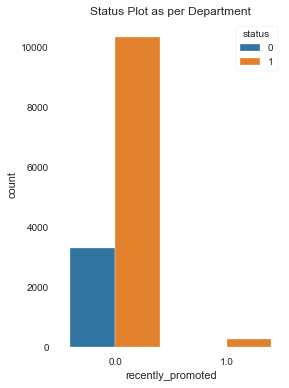

In [152]:
from matplotlib.pyplot import figure

figure(figsize=(4,6))
ax = sns.countplot(x='recently_promoted',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

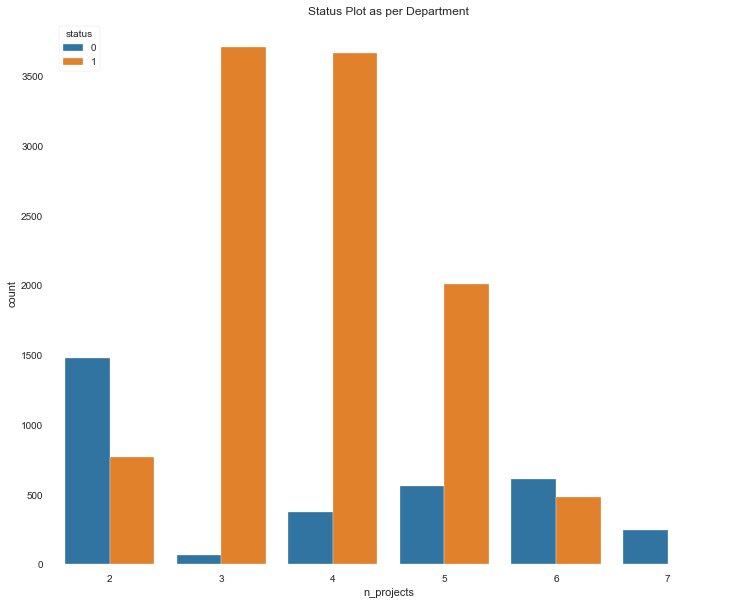

In [160]:
from matplotlib.pyplot import figure

figure(figsize=(12,10))
ax = sns.countplot(x='n_projects',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [162]:
print("7 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==7) & (emp_details_data_dept['status']==0)]))
print("7 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==7) & (emp_details_data_dept['status']==1)]))
print("6 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==6) & (emp_details_data_dept['status']==0)]))
print("6 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==6) & (emp_details_data_dept['status']==1)]))
print("5 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==5) & (emp_details_data_dept['status']==0)]))
print("5 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==5) & (emp_details_data_dept['status']==1)]))
print("4 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==4) & (emp_details_data_dept['status']==0)]))
print("4 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==4) & (emp_details_data_dept['status']==1)]))
print("3 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==3) & (emp_details_data_dept['status']==0)]))
print("3 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==3) & (emp_details_data_dept['status']==1)]))
print("2 and left ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==2) & (emp_details_data_dept['status']==0)]))
print("2 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['n_projects']==2) & (emp_details_data_dept['status']==1)]))


7 and left  242
7 and Employed  0
6 and left  614
6 and Employed  479
5 and left  560
5 and Employed  2006
4 and left  377
4 and Employed  3667
3 and left  67
3 and Employed  3711
2 and left  1475
2 and Employed  768


In [171]:
emp_details_data_dept['satisfaction_rnd']=emp_details_data_dept['satisfaction'].round(1)

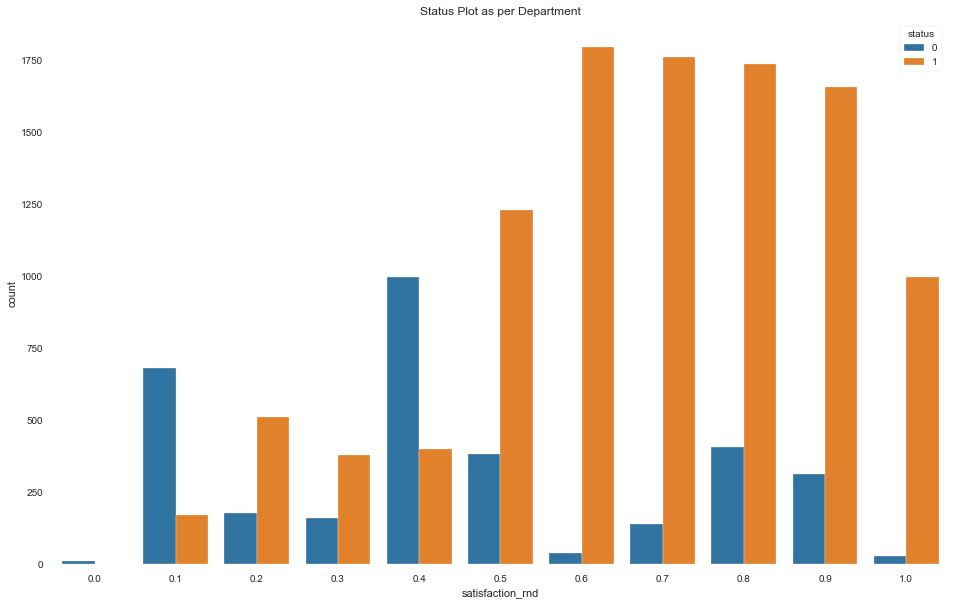

In [172]:
from matplotlib.pyplot import figure

figure(figsize=(16,10))
ax = sns.countplot(x='satisfaction_rnd',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [166]:
print(len(emp_details_data_dept['satisfaction'].unique()))

13492


In [173]:
emp_details_data_dept['last_evaluation_rnd']=emp_details_data_dept['last_evaluation'].round(1)

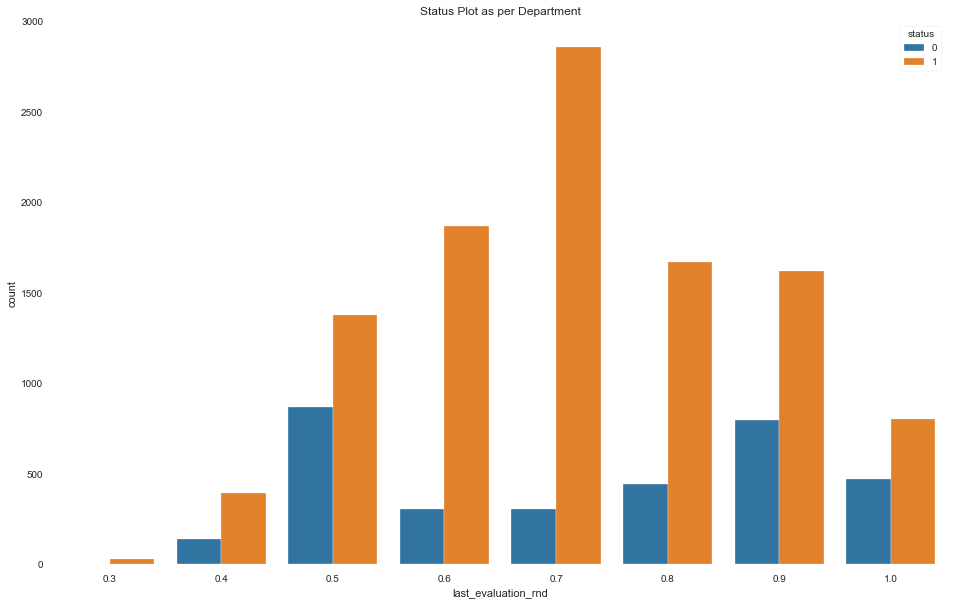

In [174]:
from matplotlib.pyplot import figure

figure(figsize=(16,10))
ax = sns.countplot(x='last_evaluation_rnd',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

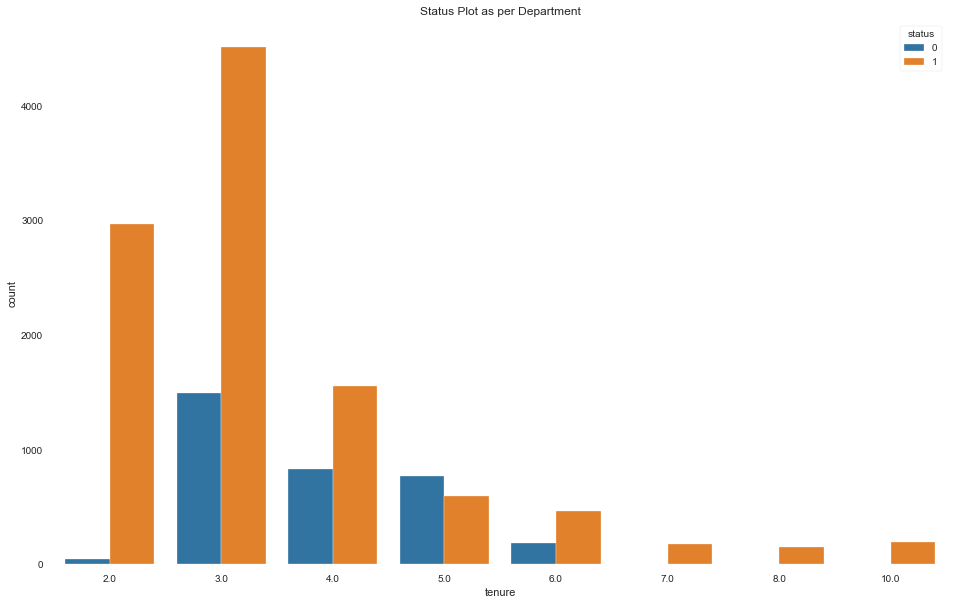

In [175]:
from matplotlib.pyplot import figure

figure(figsize=(16,10))
ax = sns.countplot(x='tenure',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [178]:
print("2 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==2) & (emp_details_data_dept['status']==0)]))
print("2 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==2) & (emp_details_data_dept['status']==1)]))
print("3 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==3) & (emp_details_data_dept['status']==0)]))
print("3 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==3) & (emp_details_data_dept['status']==1)]))
print("4 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==4) & (emp_details_data_dept['status']==0)]))
print("4 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==4) & (emp_details_data_dept['status']==1)]))
print("5 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==5) & (emp_details_data_dept['status']==0)]))
print("5 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==5) & (emp_details_data_dept['status']==1)]))
print("6 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==6) & (emp_details_data_dept['status']==0)]))
print("6 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==6) & (emp_details_data_dept['status']==1)]))
print("7 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==7) & (emp_details_data_dept['status']==0)]))
print("7 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==7) & (emp_details_data_dept['status']==1)]))
print("8 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==8) & (emp_details_data_dept['status']==0)]))
print("8 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==8) & (emp_details_data_dept['status']==1)]))
print("9 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==9) & (emp_details_data_dept['status']==0)]))
print("9 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==9) & (emp_details_data_dept['status']==1)]))
print("10 and left ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==10) & (emp_details_data_dept['status']==0)]))
print("10 and Employed ",len(emp_details_data_dept[(emp_details_data_dept['tenure']==10) & (emp_details_data_dept['status']==1)]))



2 and left  48
2 and Employed  2971
3 and left  1492
3 and Employed  4514
4 and left  834
4 and Employed  1552
5 and left  771
5 and Employed  592
6 and left  190
6 and Employed  469
7 and left  0
7 and Employed  180
8 and left  0
8 and Employed  155
9 and left  0
9 and Employed  0
10 and left  0
10 and Employed  198


In [180]:
print(emp_details_data_dept.columns)

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head', 'satisfaction_rnd', 'last_evaluation_rnd'],
      dtype='object')


In [179]:
employeePartial = employeeDataInfo[['salary','n_projects','recently_promoted','satisfaction','tenure']]

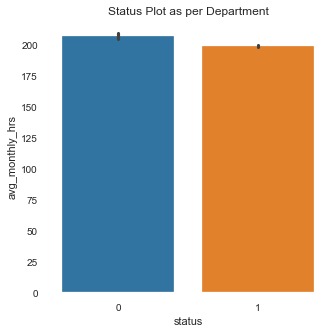

In [186]:
from matplotlib.pyplot import figure

figure(figsize=(5,5))
ax = sns.barplot(x='status',y='avg_monthly_hrs',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [187]:
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==1)]))
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==0) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==0) & (emp_details_data_dept['status']==1)]))
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==1) & (emp_details_data_dept['status']==0)]))
print(len(emp_details_data_dept[(emp_details_data_dept['filed_complaint']==1) & (emp_details_data_dept['status']==1)]))

11954
2012
3185
8769
150
1862


In [191]:
print(emp_details_data_dept.head())

   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  age  \
0                0.0       2      0.134415       0     4.0       124467   42   
1                0.0       1      0.511041       0     3.0       112210   23   
2                0.0       2      0.405101       0     3.0       126150   24   
3                0.0       1      0.152974       0     4.0       125346   51   
4                0.0       2      0.434845       0     3.0       113707   23   

   gender  marital_status dept_name        d

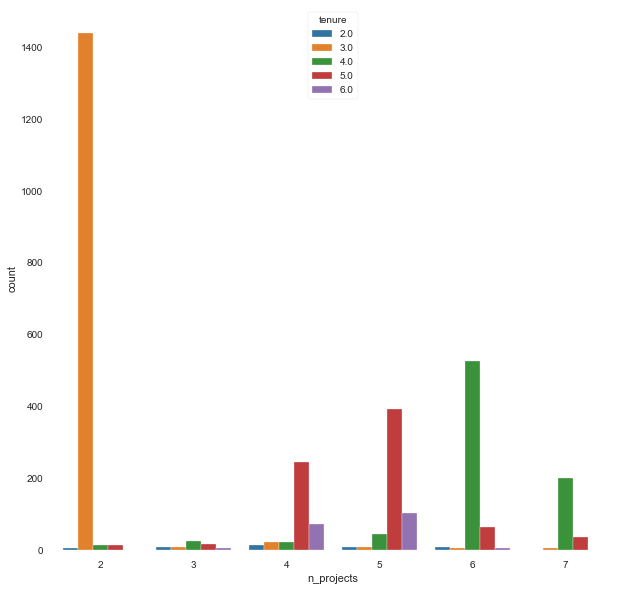

In [197]:
emp_details_data_dept_status_left = emp_details_data_dept[emp_details_data_dept['status']==0]
from matplotlib.pyplot import figure

figure(figsize=(10,10))
sns.countplot(x="n_projects", hue="tenure",data=emp_details_data_dept_status_left);

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


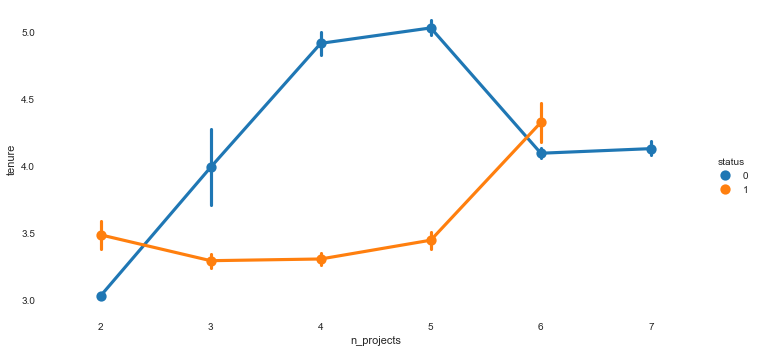

In [201]:
g =sns.factorplot(x="n_projects",y = 'tenure',hue='status',data =emp_details_data_dept,size = 5,aspect =2)

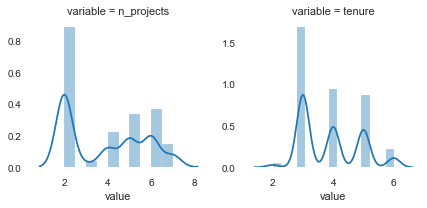

In [202]:
numerical_features=['tenure','n_projects']
f = pd.melt(emp_details_data_dept_status_left, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [ ]:
labels=data['race/ethnicity'].value_counts().index
colors=['cyan','pink','orange','lightgreen','yellow']
explode=[0,0,0.1,0,0]
n_projects_2= emp_details_data_dept_status_left[n_projects_2= emp_details_data_dept_status_left['n_projects']==2 & ]
values=[]
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

In [216]:
a_2 =(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
a_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
a_4 =(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
a_5 =(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
a_6 =(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
a_7 =(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)].employee_id.count()/
 emp_details_data_dept.employee_id.count())*100
print(a_2,a_3,a_4,a_5,a_6,a_7)

16.060432478877274 27.051410568523558 28.95603608764141 18.3731920378061 7.826149219533152 1.732779607618502


In [232]:
L_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==2)].employee_id.count())*a_2

E_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==2)].employee_id.count())*a_2

L_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==3)].employee_id.count())*a_3

E_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==3)].employee_id.count())*a_3

L_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==4)].employee_id.count())*a_4

E_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==4)].employee_id.count())*a_4

L_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==5)].employee_id.count())*a_5

E_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==5)].employee_id.count())*a_5

L_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==6)].employee_id.count())*a_6

E_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==6)].employee_id.count())*a_6

L_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==7)].employee_id.count())*a_7

E_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==7)].employee_id.count())*a_7

In [243]:
L_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==2)].employee_id.count())*100

E_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==2)].employee_id.count())*100

L_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==3)].employee_id.count())*100

E_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==3)].employee_id.count())*100

L_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==4)].employee_id.count())*100

E_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==4)].employee_id.count())*100

L_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==5)].employee_id.count())*100

E_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==5)].employee_id.count())*100

L_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==6)].employee_id.count())*100

E_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==6)].employee_id.count())*100
100
L_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==7)].employee_id.count())*100

E_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['n_projects']==7)].employee_id.count())*100

In [245]:
L_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_2=(emp_details_data_dept[(emp_details_data_dept['n_projects']==2)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100

L_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_3=(emp_details_data_dept[(emp_details_data_dept['n_projects']==3)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100

L_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_4=(emp_details_data_dept[(emp_details_data_dept['n_projects']==4)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100

L_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_5=(emp_details_data_dept[(emp_details_data_dept['n_projects']==5)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100

L_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_6=(emp_details_data_dept[(emp_details_data_dept['n_projects']==6)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100
100
L_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==0)].employee_id.count())*100

E_7=(emp_details_data_dept[(emp_details_data_dept['n_projects']==7)&(emp_details_data_dept['status']==1)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['status']==1)].employee_id.count())*100

In [246]:
print(L_2,E_2,L_3,E_3,L_4,E_4,L_5,E_5,L_6,E_6,L_7,E_7)

44.22788605697151 7.224155770858809 2.008995502248876 34.9073464396576 11.304347826086957 34.493462515285486 16.79160419790105 18.869344370237982 18.41079460269865 4.505690903960117 7.256371814092953 0.0


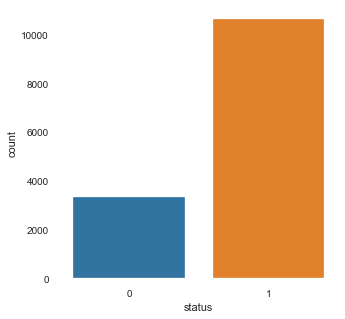

In [251]:


figure(figsize=(5,5))
ax = sns.countplot(x="status",data=emp_details_data_dept)

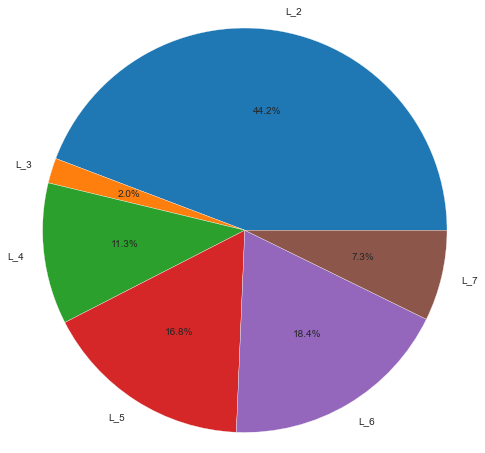

In [247]:
from matplotlib.pyplot import figure
length = len(emp_details_data_dept[(emp_details_data_dept['status']==0)])

labels = ['L_2','L_3','L_4','L_5','L_6','L_7']
sizes = [L_2,L_3,L_4,L_5,L_6,L_7]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize=(8, 8))
#ax1.set_color_cycle(['#FF6833', '#C4FF33'])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

# TOTAL EMPLOYEES LEFT , 44% ARE FROM N_PROJECTS =2 , 18% ARE FROM 6 , 15% ARE FROM 5

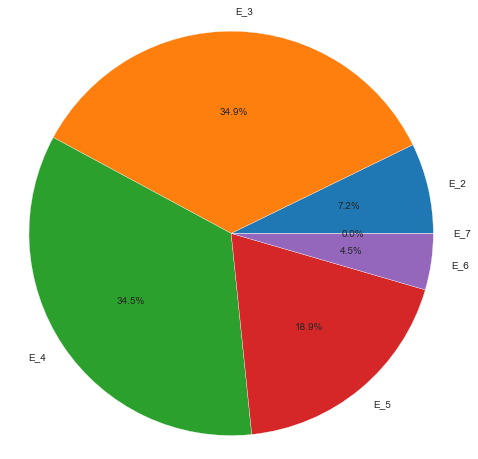

In [260]:
from matplotlib.pyplot import figure
length = len(emp_details_data_dept[(emp_details_data_dept['status']==1)])

labels = ['E_2','E_3','E_4','E_5','E_6','E_7']
sizes = [E_2,E_3,E_4,E_5,E_6,E_7]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize=(8, 8))
#ax1.set_color_cycle(['#FF6833', '#C4FF33'])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [261]:
emp_details_data_dept_left =emp_details_data_dept[(emp_details_data_dept['status']==0)]
emp_details_data_dept_Employed =emp_details_data_dept[(emp_details_data_dept['status']==1)]

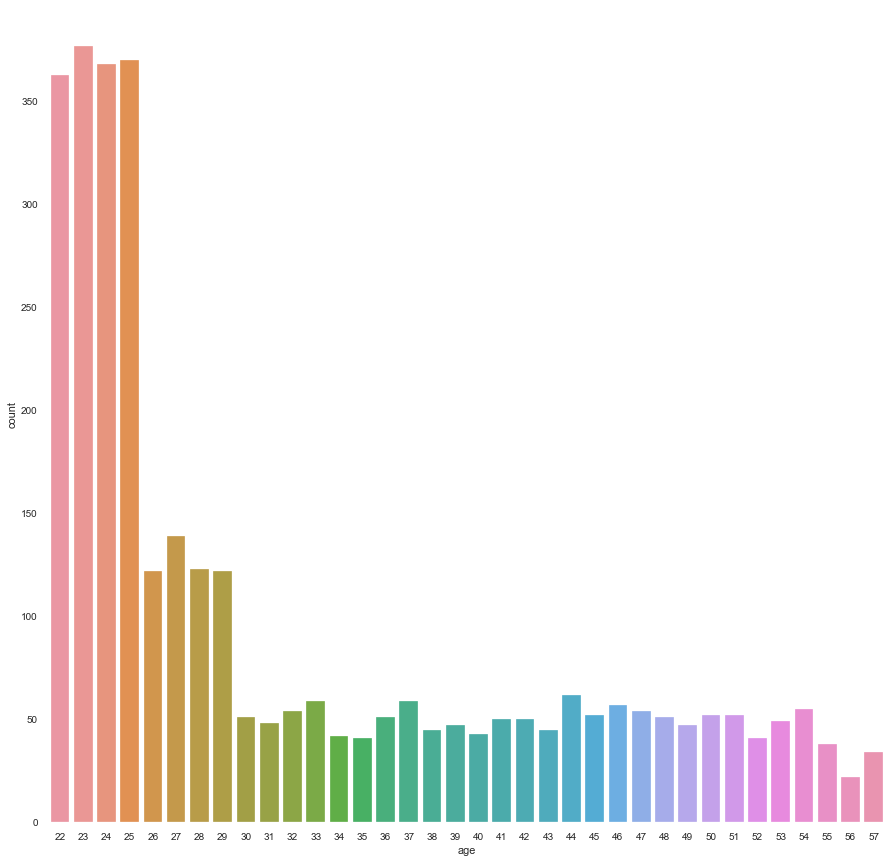

In [263]:
figure(figsize=(15,15))
ax = sns.countplot(x="age",data=emp_details_data_dept_left)

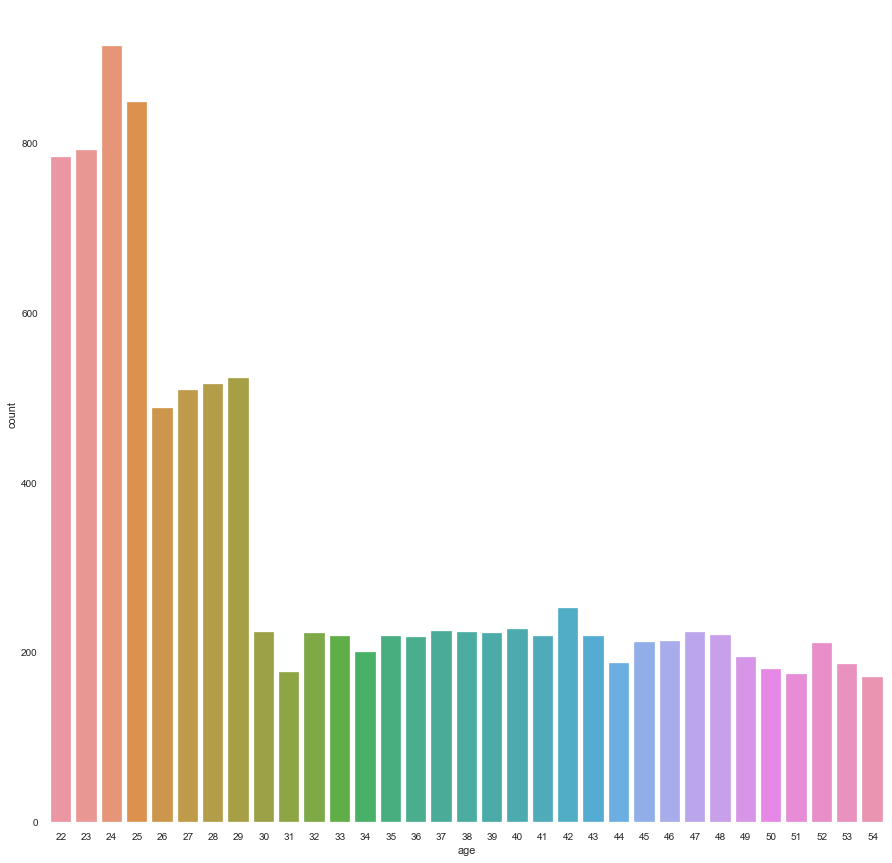

In [264]:
figure(figsize=(15,15))
ax = sns.countplot(x="age",data=emp_details_data_dept_Employed)

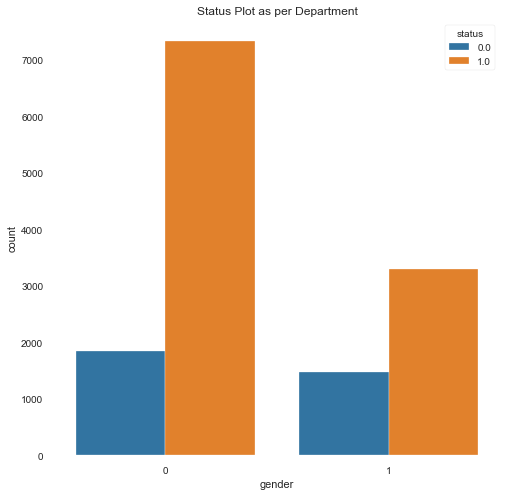

In [328]:
from matplotlib.pyplot import figure

figure(figsize=(8,8))
ax = sns.countplot(x='gender',hue='status',data=emp_details_data_dept).set_title('Status Plot as per Department')

In [332]:
G_L1=(emp_details_data_dept[(emp_details_data_dept['gender']==1)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['gender']==1)].employee_id.count())*100
G_E1=(emp_details_data_dept[(emp_details_data_dept['gender']==0)&(emp_details_data_dept['status']==0)].employee_id.count()/
 emp_details_data_dept[(emp_details_data_dept['gender']==0)].employee_id.count())*100
print(G_L1)
print(G_E1)


30.971786833855795
20.182986602766583


In [279]:
emp_details_data_dept_left['n_projects'].value_counts()

2    1475
6     614
5     560
4     377
7     242
3      67
Name: n_projects, dtype: int64

In [271]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==2]['tenure'].value_counts()

3.0    1439
5.0      15
4.0      14
2.0       7
Name: tenure, dtype: int64

In [272]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==3]['tenure'].value_counts()

4.0    26
5.0    16
2.0    10
3.0     9
6.0     6
Name: tenure, dtype: int64

In [273]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==4]['tenure'].value_counts()

5.0    245
6.0     74
3.0     22
4.0     22
2.0     14
Name: tenure, dtype: int64

In [274]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==5]['tenure'].value_counts()

5.0    393
6.0    104
4.0     45
2.0      9
3.0      9
Name: tenure, dtype: int64

In [275]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==6]['tenure'].value_counts()

4.0    527
5.0     66
2.0      8
3.0      7
6.0      6
Name: tenure, dtype: int64

In [276]:
emp_details_data_dept_left[emp_details_data_dept_left['n_projects']==7]['tenure'].value_counts()

4.0    200
5.0     36
3.0      6
Name: tenure, dtype: int64

In [290]:
print(emp_details_data_dept_left['satisfaction_rnd'].mean())
emp_details_data_dept_left['satisfaction_rnd'].median()

0.44902548725637303


0.4

In [289]:
emp_details_data_dept_Employed['satisfaction_rnd'].value_counts().sort_index()
print(emp_details_data_dept_Employed['satisfaction_rnd'].mean())
print(emp_details_data_dept_Employed['satisfaction_rnd'].median())

0.6763992098579595
0.7


In [291]:
print(emp_details_data_dept_left['salary'].value_counts())
print(emp_details_data_dept_Employed['salary'].value_counts())


1    2030
2    1229
3      76
Name: salary, dtype: int64
1    4795
2    4780
3    1056
Name: salary, dtype: int64


In [293]:
print(emp_details_data_dept_left['recently_promoted'].value_counts())
print(emp_details_data_dept_Employed['recently_promoted'].value_counts())



0.0    3317
1.0      18
Name: recently_promoted, dtype: int64
0.0    10352
1.0      279
Name: recently_promoted, dtype: int64


In [299]:
print(emp_details_data_dept_left[emp_details_data_dept_left['recently_promoted']==1]['salary'].value_counts())

1    14
2     4
Name: salary, dtype: int64


In [305]:
print(emp_details_data_dept_Employed[emp_details_data_dept_Employed['recently_promoted']==1]['salary'].value_counts().sort_index())

1     51
2    160
3     68
Name: salary, dtype: int64


In [306]:
print(emp_details_data_dept_left[emp_details_data_dept_left['recently_promoted']==0]['n_projects'].value_counts())

2    1464
6     611
5     560
4     373
7     242
3      67
Name: n_projects, dtype: int64


In [309]:
print(emp_details_data_dept_Employed[emp_details_data_dept_Employed['recently_promoted']==1]['n_projects'].value_counts().sort_index())

2     23
3     89
4    106
5     45
6     16
Name: n_projects, dtype: int64


In [314]:
print(emp_details_data_dept_left['last_evaluation_rnd'].mean())
print(emp_details_data_dept_Employed['last_evaluation_rnd'].mean())

0.7296251874063058
0.7131314081459714


In [352]:
df_Attr=emp_details_data_dept
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Attr_col = ['recently_promoted','salary','n_projects','satisfaction_rnd','tenure']
#Attr_col = emp_details_data_dept.columns.tolist()
for col in Attr_col:
    df_Attr[col] = df_Attr[col].astype(float)
    df_Attr[[col]] = scaler.fit_transform(df_Attr[[col]])
df_Attr['status'] = pd.to_numeric(df_Attr['status'], downcast='float')
df_Attr.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head,satisfaction_rnd,last_evaluation_rnd
0,0.700935,D00-SS,0.0,0.866838,0.8,0.0,0.5,0.134415,0.0,0.250,124467,42,1,1,Sales,Edward J Bayley,0.1,0.9
1,0.177570,D00-SS,0.0,0.555718,0.0,0.0,0.0,0.511041,0.0,0.125,112210,23,1,0,Sales,Edward J Bayley,0.5,0.6
2,0.280374,D00-SS,1.0,0.474082,0.0,0.0,0.5,0.405101,0.0,0.125,126150,24,1,0,Sales,Edward J Bayley,0.4,0.5
3,0.747664,D00-SP,0.0,0.961360,0.8,0.0,0.0,0.152974,0.0,0.250,125346,51,1,1,Support,Amelia Westray,0.2,1.0
4,0.233645,D00-SS,0.0,0.507349,0.0,0.0,0.5,0.434845,0.0,0.125,113707,23,1,0,Sales,Edward J Bayley,0.4,0.5


In [353]:
df_Attr=emp_details_data_dept
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Attr_col = ['recently_promoted','salary','n_projects','satisfaction_rnd','tenure']
#Attr_col = emp_details_data_dept.columns.tolist()
for col in Attr_col:
    if(type(df_Attr[col])==float):
        df_Attr[col] = df_Attr[col].astype(float)
        df_Attr[[col]] = scaler.fit_transform(df_Attr[[col]])
df_Attr['status'] = pd.to_numeric(df_Attr['status'], downcast='float')
df_Attr.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head,satisfaction_rnd,last_evaluation_rnd
0,0.700935,D00-SS,0.0,0.866838,0.8,0.0,0.5,0.134415,0.0,0.250,124467,42,1,1,Sales,Edward J Bayley,0.1,0.9
1,0.177570,D00-SS,0.0,0.555718,0.0,0.0,0.0,0.511041,0.0,0.125,112210,23,1,0,Sales,Edward J Bayley,0.5,0.6
2,0.280374,D00-SS,1.0,0.474082,0.0,0.0,0.5,0.405101,0.0,0.125,126150,24,1,0,Sales,Edward J Bayley,0.4,0.5
3,0.747664,D00-SP,0.0,0.961360,0.8,0.0,0.0,0.152974,0.0,0.250,125346,51,1,1,Support,Amelia Westray,0.2,1.0
4,0.233645,D00-SS,0.0,0.507349,0.0,0.0,0.5,0.434845,0.0,0.125,113707,23,1,0,Sales,Edward J Bayley,0.4,0.5


In [354]:
print(df_Attr.columns)

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head', 'satisfaction_rnd', 'last_evaluation_rnd'],
      dtype='object')


In [361]:
# shortlisted features from test dataset:
#cols = ['recently_promoted','salary','n_projects','satisfaction_rnd','tenure']
cols = ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'satisfaction_rnd', 'last_evaluation_rnd']
X=df_Attr[cols]
y=df_Attr['status']    

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=y)
print("Number of samples in X_train dataset: ", X_train.shape)
print("Number of samples in y_train dataset: ", y_train.shape)
print("Number of samples in X_test dataset: ", X_test.shape)
print("Number of samples in y_test dataset: ", y_test.shape)



Number of samples in X_train dataset:  (10474, 15)
Number of samples in y_train dataset:  (10474,)
Number of samples in X_test dataset:  (3492, 15)
Number of samples in y_test dataset:  (3492,)


In [364]:
data_final_vars=df_Attr.columns.values.tolist()
print(cols)
y=['status']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'satisfaction_rnd', 'last_evaluation_rnd']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [366]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
logreg = LogisticRegression()
# fit the model with data
result =logreg.fit(y_train,X_train)
#
#y_pred=logreg.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [340]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 1.4875573   1.37597526  0.8122177   3.82218125 -1.9782622 ]]
[-1.26817022]


In [368]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


         Current function value: inf
         Iterations: 35


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [325]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [326]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.957


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


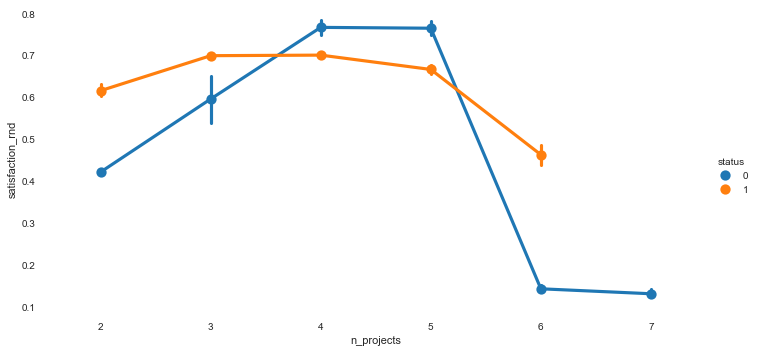

In [240]:
g =sns.factorplot(x="n_projects",y = 'satisfaction_rnd',hue='status',data =emp_details_data_dept,size = 5,aspect =2)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


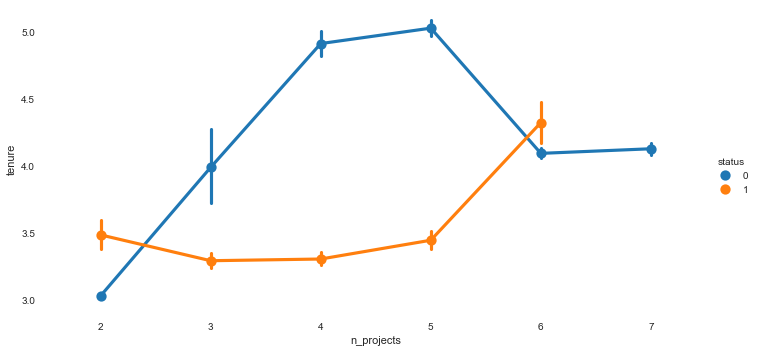

In [241]:
g =sns.factorplot(x="n_projects",y = 'tenure',hue='status',data =emp_details_data_dept,size = 5,aspect =2)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


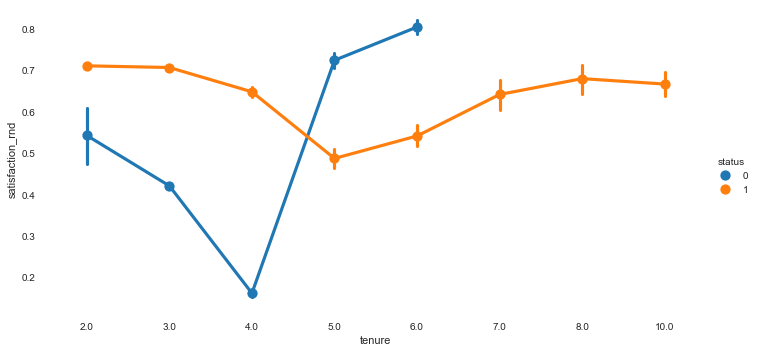

In [242]:
g =sns.factorplot(x="tenure",y = 'satisfaction_rnd',hue='status',data =emp_details_data_dept,size = 5,aspect =2)

# Observations From Pre Profiling :
 1. Department distinct values in employee data is 12 and in deprtament table , it is 11 . Employee data has extra department values (nan(missing data, 707),(-IT, 207)) 
 2. Filed complaint has only 1 value that is 1 rest all null (we can make it 0)
 3. There are 5 entries in employee data with eployee_id =0 which is not there in employee
 4. Employee id is repeating in employee Data Table


# Cross check Department names in department and Employee data 


In [41]:
set1 =set(deptInfo['dept_id'])
set2 = set(employeeDataInfo['department'])
print("Id which is there in dept but not in employee",set1-set2)
print("Id which is there in employee but not in department",set2-set1)
print(set2)
print("Length of null Department ",len(employeeDataInfo[employeeDataInfo['department'].isnull()]))
print("Length of - IT Department ",len(employeeDataInfo[employeeDataInfo['department']=='-IT']))

Id which is there in dept but not in employee set()
Id which is there in employee but not in department {nan, '-IT'}
{nan, 'D00-MT', 'D00-AD', 'D00-PD', 'D00-MN', 'D00-ENG', 'D00-FN', '-IT', 'D00-PR', 'D00-SP', 'D00-IT', 'D00-TP', 'D00-SS'}
Length of null Department  707
Length of - IT Department  207


# EmployeeData and Employee

In [40]:
set1 =set(employeeInfo['employee_id'])
set2 = set(employeeDataInfo['employee_id'])
print("Id which is there in employee but not in employeedata",len(set1-set2))
print("Id which is there in employeedata but not in employee",len(set2-set1))
print("Id which is not present in employeedata ",set2-set1)
print("Length of null Department ",len(employeeDataInfo[employeeDataInfo['employee_id']==0]))
print("Distinct employee_id",len(employeeDataInfo['employee_id'].unique()))
print("Distinct employee_id",len(employeeDataInfo))

Id which is there in employee but not in employeedata 129
Id which is there in employeedata but not in employee 1
Id which is not present in employeedata  {0}
Length of null Department  5
Distinct employee_id 14117
Distinct employee_id 14150


## Employee Data Info Observations
 1. Repeated  employee info twice for some employee id . we can drop the duplicated entries  
 2. Valid information with employee id =0 , 5 entries .
 ## 3. Employee for whom Tenure Info which is missing 
     a.is from "D00-TP"
     b.having last_evaluation , satisfaction recently_promoted as nan and  salary is med,low,high , status as left and Employed  , 
     c.filed complain by 40,
     d. n_projects as 3 2 1 , 
     e. avrg monthly hrs = 100 ascompared to employeeDataIfo which is having 200

In [71]:
counts = employeeDataInfo['employee_id'].value_counts()
print(counts[counts > 1])

0         5
119780    2
104360    2
116850    2
109425    2
116533    2
105625    2
117454    2
102701    2
108265    2
112373    2
111323    2
106813    2
115446    2
112312    2
115325    2
110000    2
112203    2
111968    2
108128    2
101809    2
122385    2
116247    2
116153    2
116209    2
110546    2
109804    2
109085    2
108535    2
119754    2
Name: employee_id, dtype: int64


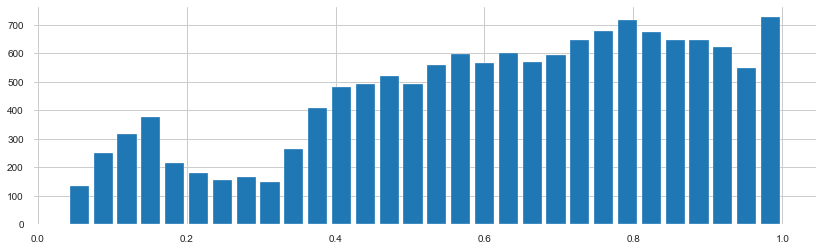

In [73]:
employeeDataInfo.satisfaction.hist(bins=30, rwidth=.8, figsize=(14,4))

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


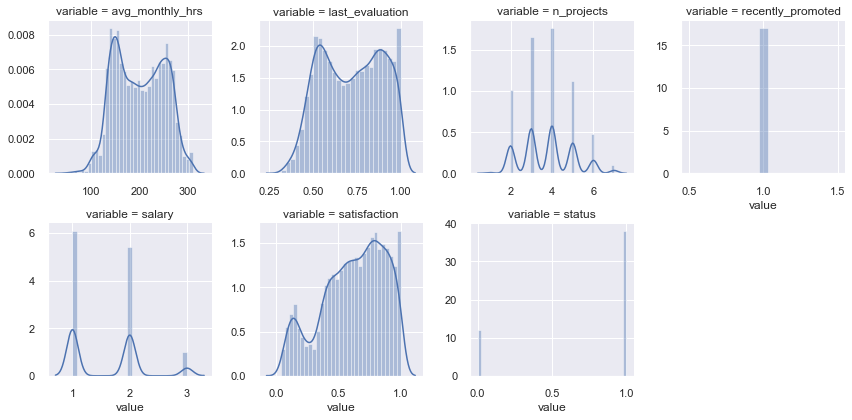

In [133]:
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(employeeDataInfo, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


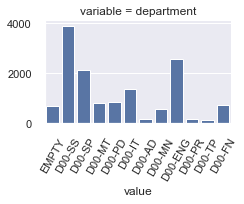

In [202]:
# Count plots of categorical features
import pandas as pd
import matplotlib.pyplot as plt
f = pd.melt(employeeDataInfo, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [212]:
print(employeeDataInfo['department'].value_counts())

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64


# Replacing last_evaluation with mean ?

In [343]:
lastEvaluationArray = employeeDataInfo[employeeDataInfo['last_evaluation']!=np.nan]['last_evaluation']
print(lastEvaluationArray)
employeeDataInfo['last_evaluation'].fillna(lastEvaluationArray.mean(),inplace=True)

0        0.866838
1        0.555718
2        0.474082
3        0.961360
4        0.507349
           ...   
14145    0.850785
14146    0.951901
14147    0.854538
14148    0.900887
14149    0.897098
Name: last_evaluation, Length: 14000, dtype: float64


In [344]:
print(employeeDataInfo.isnull().sum())

avg_monthly_hrs        0
department           707
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
employee_id            0
dtype: int64


In [345]:
employeePartial = employeeDataInfo[['department','satisfaction','last_evaluation','avg_monthly_hrs']]

In [346]:
print(employeePartial.isnull().sum())

department         707
satisfaction         0
last_evaluation      0
avg_monthly_hrs      0
dtype: int64


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


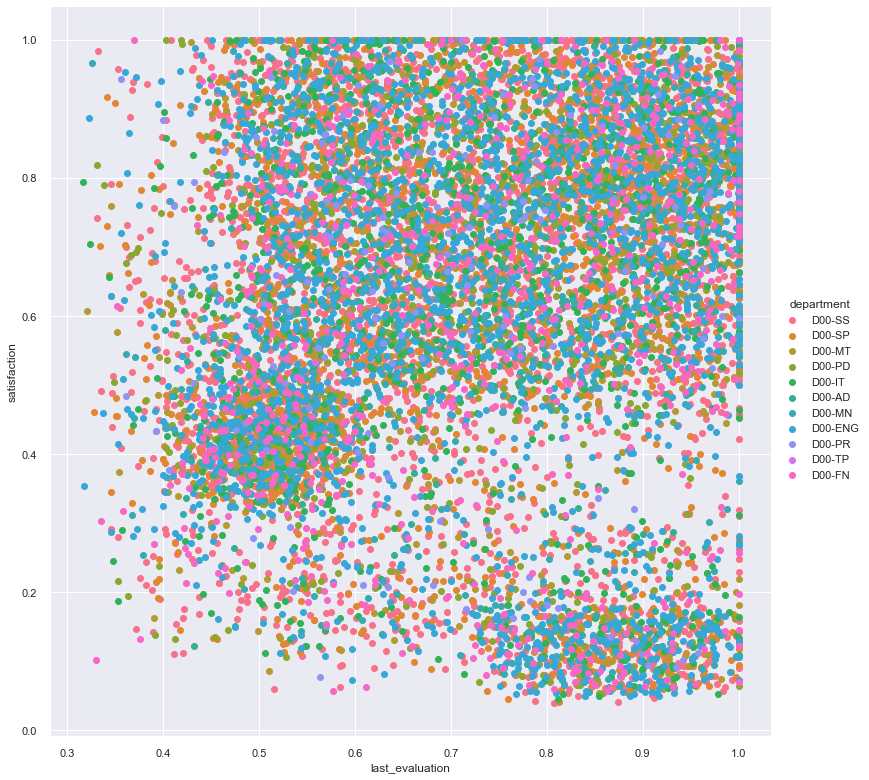

In [216]:
sns.FacetGrid(employeePartial, hue="department", size=11) \
   .map(plt.scatter, "last_evaluation", "satisfaction") \
   .add_legend()

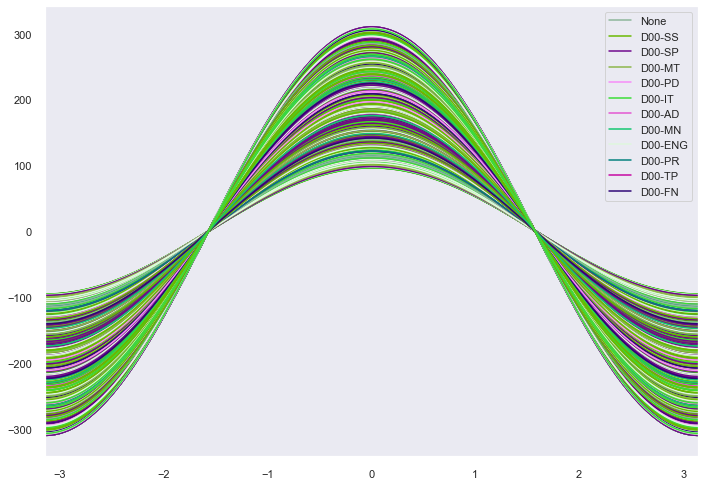

In [219]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(employeePartial, "department")

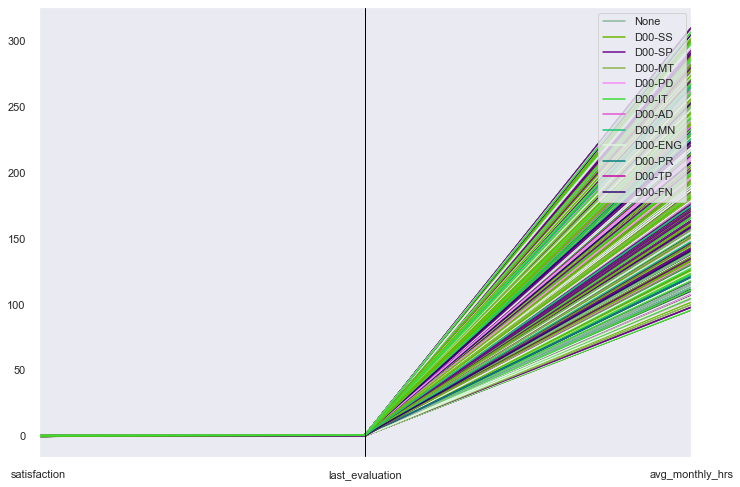

In [220]:
# Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(employeePartial, "department")

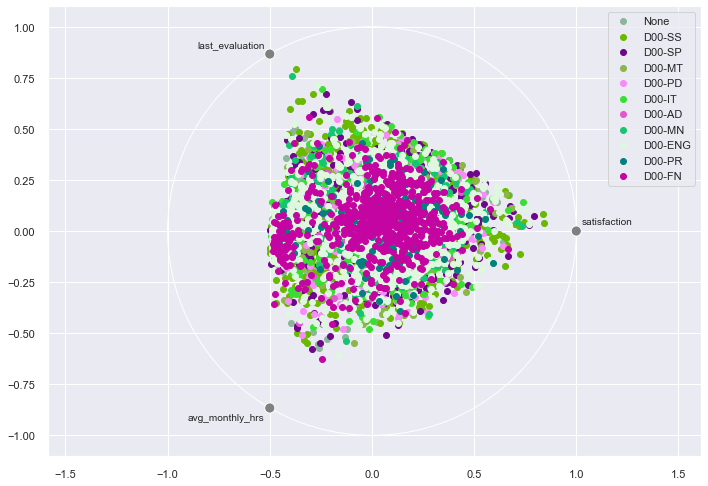

In [261]:
# Radviz puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(employeePartial, "department")

In [347]:
print((employeePartial))

      department  satisfaction  last_evaluation  avg_monthly_hrs
0            NaN      0.134415         0.866838            246.0
1            NaN      0.511041         0.555718            134.0
2         D00-SS      0.405101         0.474082            156.0
3         D00-SP      0.152974         0.961360            256.0
4         D00-SS      0.434845         0.507349            146.0
...          ...           ...              ...              ...
14145     D00-SS      0.225084         0.850785            245.0
14146     D00-SS      0.539834         0.951901            192.0
14147     D00-MN      0.934465         0.854538            175.0
14148     D00-MT      0.906613         0.900887            268.0
14149     D00-IT      0.459371         0.897098            268.0

[14000 rows x 4 columns]


In [348]:
employeePartialTest = employeePartial[employeePartial['department'].notnull()]
print(employeePartialTest)
print(employeePartialTest.isnull().sum())

      department  satisfaction  last_evaluation  avg_monthly_hrs
2         D00-SS      0.405101         0.474082            156.0
3         D00-SP      0.152974         0.961360            256.0
4         D00-SS      0.434845         0.507349            146.0
5         D00-MT      0.381545         0.482184            135.0
6         D00-PD      0.172575         0.867087            270.0
...          ...           ...              ...              ...
14145     D00-SS      0.225084         0.850785            245.0
14146     D00-SS      0.539834         0.951901            192.0
14147     D00-MN      0.934465         0.854538            175.0
14148     D00-MT      0.906613         0.900887            268.0
14149     D00-IT      0.459371         0.897098            268.0

[13293 rows x 4 columns]
department         0
satisfaction       0
last_evaluation    0
avg_monthly_hrs    0
dtype: int64


In [349]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

label = employeePartialTest.pop('department')

sc.fit(employeePartialTest)                                                                                   # fit the data to Standardscaler

employeePartial_scale = sc.transform(employeePartialTest)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(employeePartial_scale, columns=employeePartialTest.columns).head())                                  # Put it to dataframe                              



After standardizing our features, the first 5 rows of our data now look like this:

   satisfaction  last_evaluation  avg_monthly_hrs
0     -0.866316        -1.485021        -0.905007
1     -1.872929         1.476506         1.097953
2     -0.747564        -1.282834        -1.105304
3     -0.960363        -1.435779        -1.325629
4     -1.794672         0.903544         1.378368


In [350]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(employeePartial_scale, label, test_size = 0.2, random_state = 42)

In [352]:
print('There are {} samples in the training set and {} samples in the test set'.format(
data_train.shape[0], data_test.shape[0]))

There are 10634 samples in the training set and 2659 samples in the test set


In [353]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')

In [354]:
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [355]:
y_preds = knn.predict(data_test)

In [356]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.16284317412561114


In [357]:
knn5 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn5.fit(data_train, label_train)
y_preds = knn5.predict(data_test)
knn5_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn5_accuracy)

Accuracy score for the KNN model: 0.21887927792403158


In [359]:
knn9 = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
knn9.fit(data_train, label_train)
y_preds = knn9.predict(data_test)
knn9_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn9_accuracy)

Accuracy score for the KNN model: 0.23166603986461076


In [360]:
knn103 = KNeighborsClassifier(n_neighbors=103, p=2, metric='minkowski')
knn103.fit(data_train, label_train)
y_preds = knn103.predict(data_test)
knn103_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN 103 model:', knn103_accuracy)

Accuracy score for the KNN 103 model: 0.2801805189921023


In [370]:
knn99 = KNeighborsClassifier(n_neighbors=99, p=2, metric='minkowski')
knn99.fit(data_train, label_train)
y_preds = knn99.predict(data_test)
knn99_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN 103 model:', knn99_accuracy)

Accuracy score for the KNN 103 model: 0.282437006393381


In [369]:
#import sklearn.grid_search
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(3,103,2))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(data_train, label_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 99


In [371]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

In [372]:
logis.fit(data_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
y_pred = logis.predict(data_test)

In [374]:
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.2907107935314028


# Tenure 

In [101]:
TenureInfo = employeeDataInfo[employeeDataInfo['tenure'].isnull()]
print(TenureInfo['department'].unique())
print(TenureInfo['salary'].unique())
print(TenureInfo['status'].unique())

['D00-TP']
['medium' 'low' 'high']
['Left' 'Employed']


Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'recently_promoted',
       'satisfaction'],
      dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


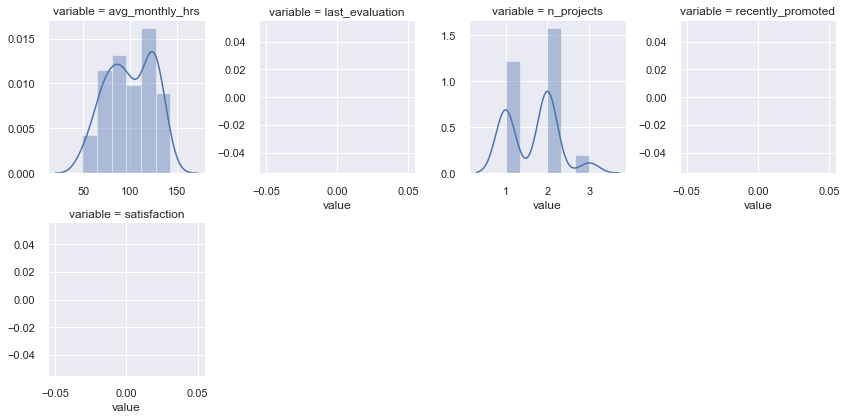

In [108]:
numerical_features = TenureInfo.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(TenureInfo, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

Index(['department', 'filed_complaint', 'salary', 'status'], dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


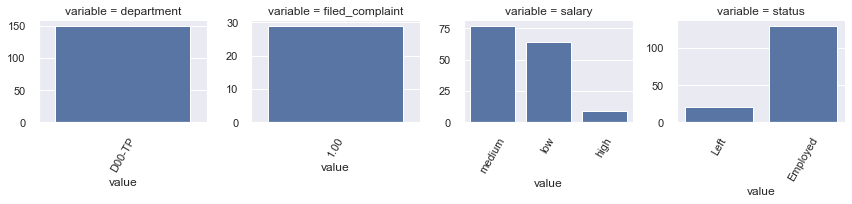

In [107]:
# Count plots of categorical features
categorical_features = TenureInfo.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['tenure'],1)
print(categorical_features)
import pandas as pd
import matplotlib.pyplot as plt
f = pd.melt(TenureInfo, value_vars=sorted(categorical_features.to_list()))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [116]:
print(TenureInfo['last_evaluation'].unique())
print(TenureInfo['recently_promoted'].unique())
print(TenureInfo['satisfaction'].unique())
print(TenureInfo['n_projects'].unique())
print(TenureInfo['avg_monthly_hrs'].median())
print(employeeDataInfo['avg_monthly_hrs'].mean())
#print(TenureInfo)

[nan]
[nan]
[nan]
[3 2 1]
99.5
199.99434628975266


# Filed Complaint Null

In [119]:
Filed_Complaint= employeeDataInfo[employeeDataInfo['filed_complaint'].isnull()]
print(len(Filed_Complaint))

12104


Index(['department', 'salary', 'status', 'tenure'], dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


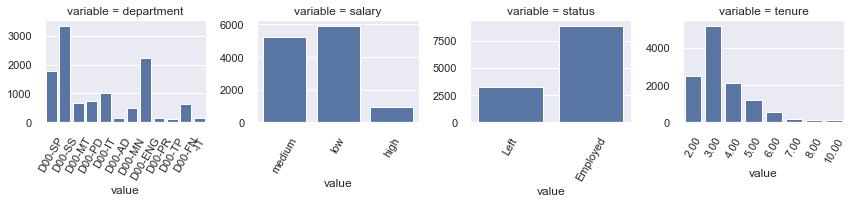

In [120]:
# Count plots of categorical features
categorical_features = Filed_Complaint.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['filed_complaint'],1)
print(categorical_features)
import pandas as pd
import matplotlib.pyplot as plt
f = pd.melt(Filed_Complaint, value_vars=sorted(categorical_features.to_list()))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

# Department Null

707
Index(['filed_complaint', 'salary', 'status', 'tenure'], dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


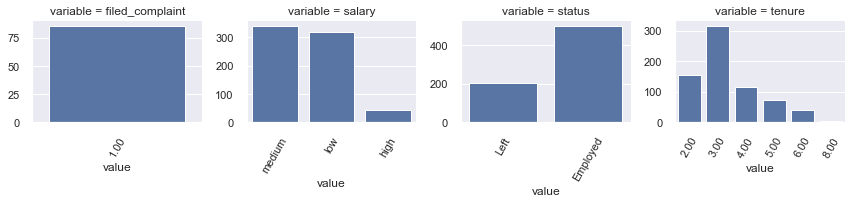

In [126]:
Department_Null= employeeDataInfo[employeeDataInfo['department'].isnull()]
print(len(Department_Null))

categorical_features_dept = Department_Null.select_dtypes(include=['object']).columns
categorical_features_dept = categorical_features_dept.drop(['department'],1)
print(categorical_features_dept)
import pandas as pd
import matplotlib.pyplot as plt
f = pd.melt(Department_Null, value_vars=sorted(categorical_features_dept.to_list()))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'recently_promoted',
       'satisfaction'],
      dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


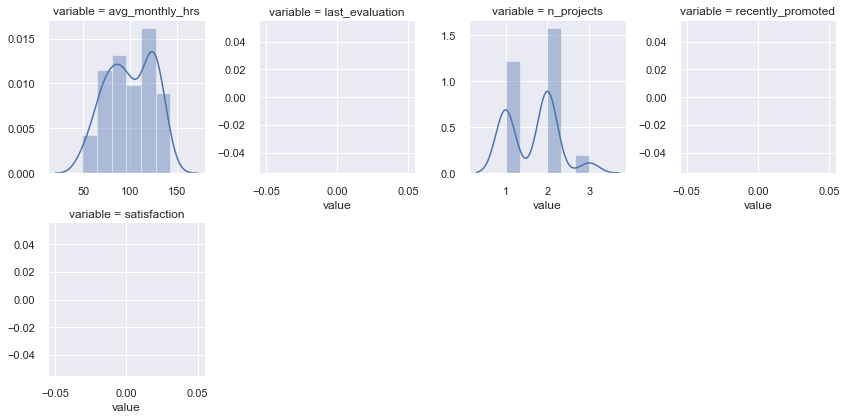

In [124]:
numerical_features = Department_Null.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(TenureInfo, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [152]:
#Scatter plots of numerical features against SalePrice
print(num_features)
f = pd.melt(employeeDataInfo, id_vars=['status'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'status', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure']


Exception: Data must be 1-dimensional

# Last Evaluation Null

1487


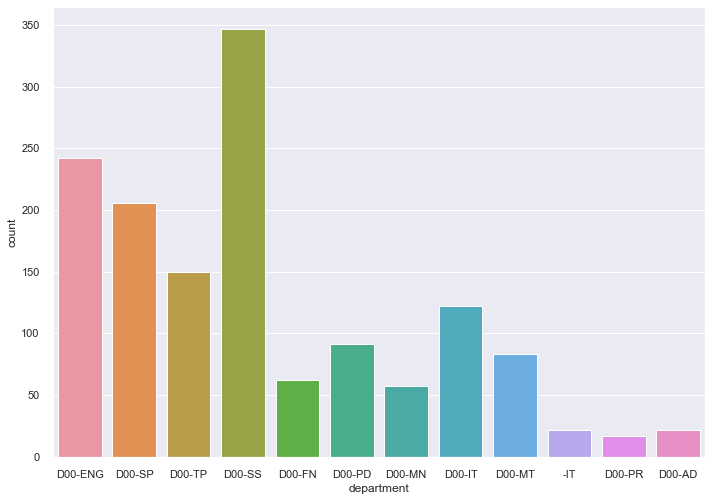

<Figure size 1080x576 with 0 Axes>

In [160]:
LastEvaluation_Null= employeeDataInfo[employeeDataInfo['last_evaluation'].isnull()]
print(len(LastEvaluation_Null))

sns.countplot(data=LastEvaluation_Null,x =LastEvaluation_Null['department'])
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(15,8))
plt.show()

1487
Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


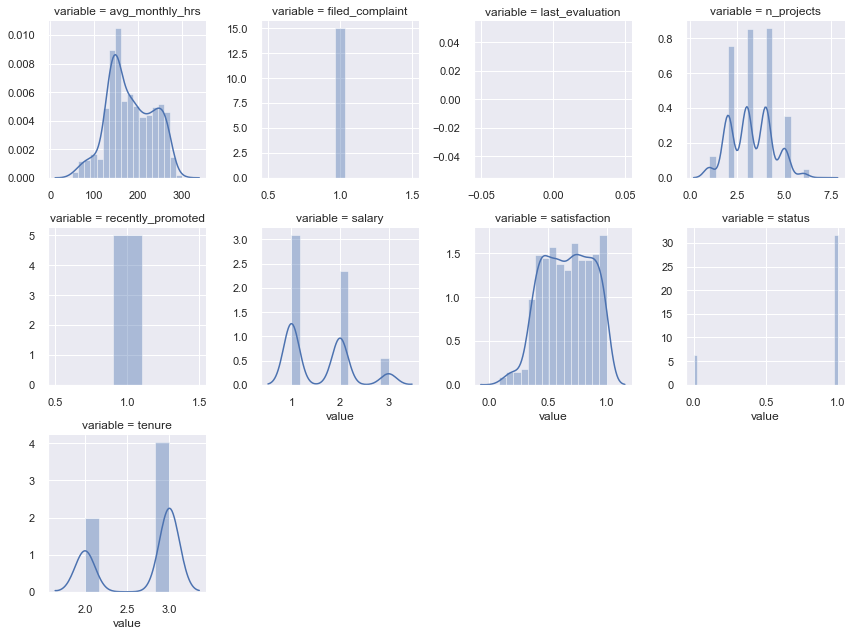

In [155]:
LastEvaluation_Null= employeeDataInfo[employeeDataInfo['last_evaluation'].isnull()]
print(len(LastEvaluation_Null))

numerical_features = ç.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(LastEvaluation_Null, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [156]:
LastEvaluation_Null.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,1487.000000,242.0,0.0,1487.000000,31.0,1487.000000,1337.000000,1487.000000,1337.000000,1487.000000
mean,181.648285,1.0,NaN,3.242098,1.0,1.578346,0.663687,0.831876,2.670905,111949.667787
std,51.988242,0.0,NaN,1.132787,0.0,0.655561,0.206462,0.374102,0.470060,8694.749322
min,49.000000,1.0,NaN,1.000000,1.0,1.000000,0.085808,0.000000,2.000000,100121.000000
25%,143.000000,1.0,NaN,2.000000,1.0,1.000000,0.489583,1.000000,2.000000,105792.500000
50%,175.000000,1.0,NaN,3.000000,1.0,1.000000,0.670944,1.000000,3.000000,110843.000000
75%,225.500000,1.0,NaN,4.000000,1.0,2.000000,0.838085,1.000000,3.000000,116098.500000
max,301.000000,1.0,NaN,7.000000,1.0,3.000000,1.000000,1.000000,3.000000,148916.000000


In [157]:
employeeDataInfo.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14150.000000,14000.000000,14150.00000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,1.592721,0.621212,0.76212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.634812,0.250482,0.42580,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,1.000000,0.040058,0.00000,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,1.000000,0.450356,1.00000,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,2.000000,0.652394,1.00000,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,2.000000,0.824925,1.00000,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,3.000000,1.000000,1.00000,10.000000,148988.000000


# Scatter Plots

In [296]:
employeeDataInfo.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
avg_monthly_hrs,1.000000,NaN,0.340066,0.418873,NaN,-0.004469,-0.020791,-0.070497,0.125083,0.010569
filed_complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,0.340066,NaN,1.000000,0.346152,NaN,-0.014943,0.087839,-0.040814,0.130785,0.014737
n_projects,0.418873,NaN,0.346152,1.000000,NaN,-0.001082,-0.144069,-0.023156,0.193346,0.001517
recently_promoted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,-0.004469,NaN,-0.014943,-0.001082,NaN,1.000000,0.055234,0.157358,0.047772,-0.033327
satisfaction,-0.020791,NaN,0.087839,-0.144069,NaN,0.055234,1.000000,0.388023,-0.098169,-0.073684
status,-0.070497,NaN,-0.040814,-0.023156,NaN,0.157358,0.388023,1.000000,-0.141791,-0.212871
tenure,0.125083,NaN,0.130785,0.193346,NaN,0.047772,-0.098169,-0.141791,1.000000,0.007565
employee_id,0.010569,NaN,0.014737,0.001517,NaN,-0.033327,-0.073684,-0.212871,0.007565,1.000000


['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure']


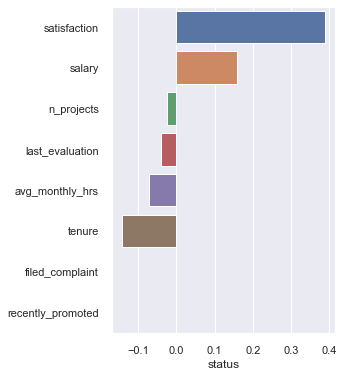

In [297]:
colu = num_features
print(colu)
corr = employeeDataInfo[colu].corr()
corr = corr.sort_values('status', ascending=False)
#print(corr)
plt.figure(figsize=(4,6))
g=sns.barplot( corr.status[1:], corr.index[1:], orient='h')
#for index, row in corr.iterrows():
  #  g.text(color='black', ha="center")
plt.show()

['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure']


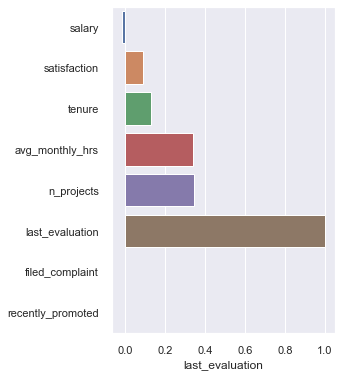

In [298]:
colu = num_features
print(colu)
corr = employeeDataInfo[colu].corr()
corr = corr.sort_values('last_evaluation', ascending=True)
plt.figure(figsize=(4,6))
g=sns.barplot( corr.last_evaluation[1:], corr.index[1:], orient='h')
plt.show()

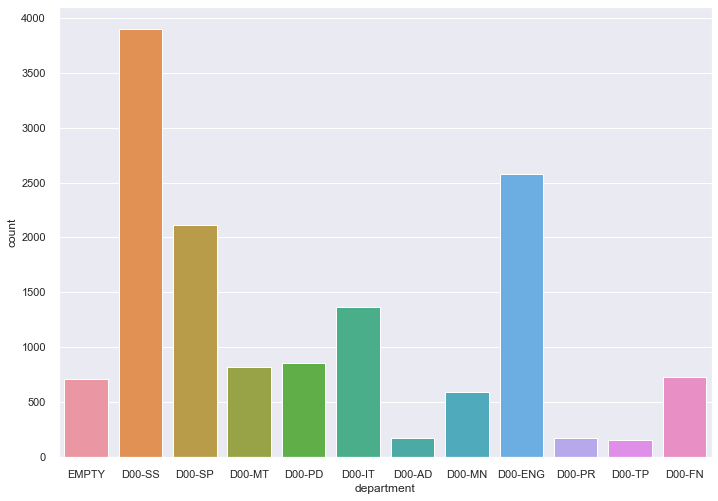

<Figure size 1080x576 with 0 Axes>

In [193]:
DepartmentInfo = employeeDataInfo[employeeDataInfo['department'].notnull()]

sns.countplot(data=DepartmentInfo,x =DepartmentInfo['department'])
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(15,8))
plt.show()

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


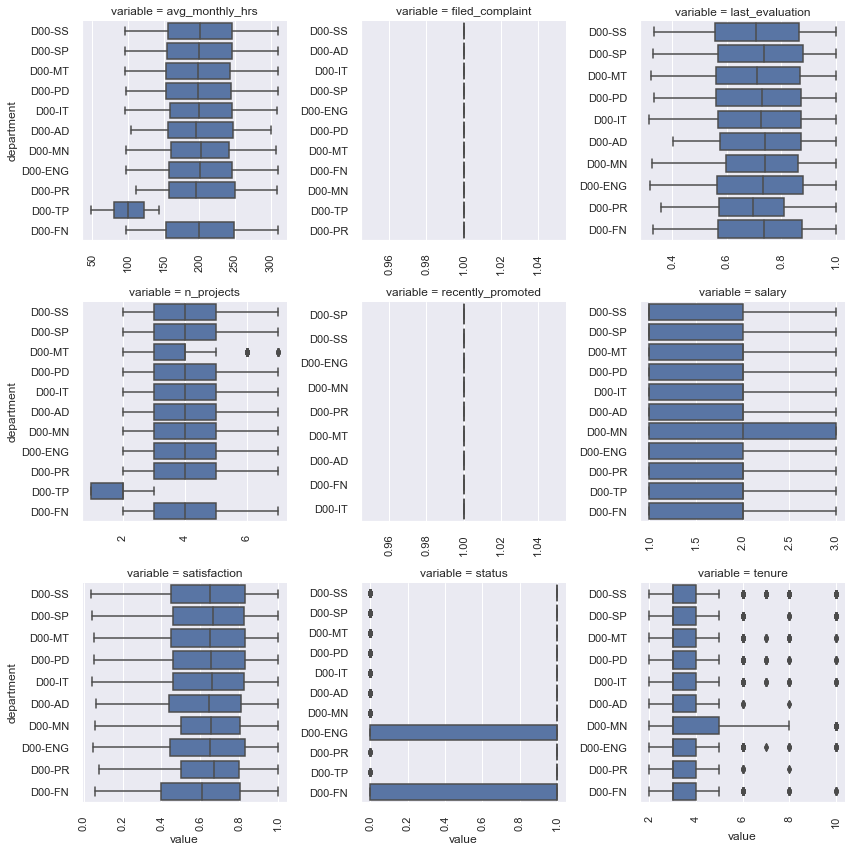

In [181]:
f = pd.melt(employeeDataInfo, id_vars=['department'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'department')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

150
Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:905: 

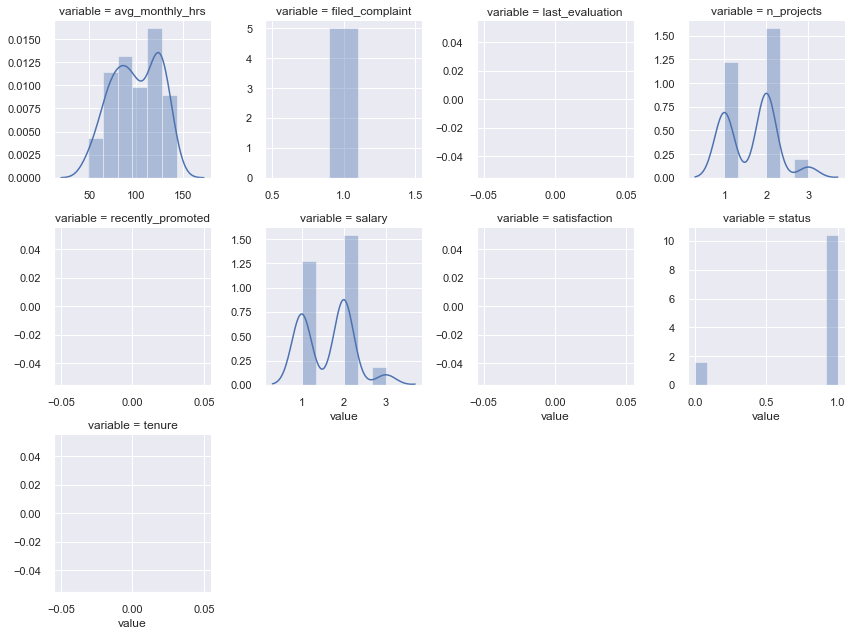

In [222]:
DepartmentInfoNull = employeeDataInfo[employeeDataInfo['department']=='D00-TP']
print(len(DepartmentInfoNull))

numerical_features = DepartmentInfoNull.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(DepartmentInfoNull, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [ ]:
DepartmentInfoNull = employeeDataInfo[employeeDataInfo['department']=='EMPTY']
print(len(DepartmentInfoNull))

numerical_features = DepartmentInfoNull.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(DepartmentInfoNull, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

815
Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')


/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


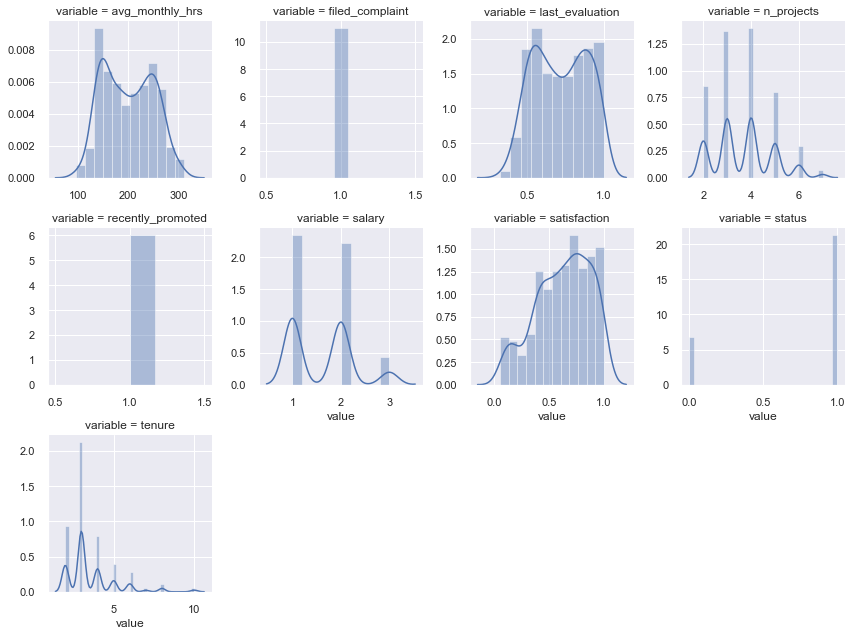

In [189]:
DepartmentInfoMT= employeeDataInfo[employeeDataInfo['department']=='D00-MT']
print(len(DepartmentInfoMT))

numerical_features = DepartmentInfoMT.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['employee_id'],1)
print(numerical_features)
import seaborn as sns
sns.set(style="darkgrid")
f = pd.melt(DepartmentInfoMT, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [194]:
employeeDataInfo[employeeDataInfo['department']=='EMPTY'].describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,707.000000,86.0,641.000000,707.000000,15.0,707.000000,707.000000,707.000000,707.000000,707.000000
mean,198.950495,1.0,0.717933,3.674682,1.0,1.608204,0.604743,0.710042,3.369165,112057.660537
std,50.519360,0.0,0.174846,1.236357,0.0,0.602723,0.250132,0.454064,1.183364,9531.790318
min,98.000000,1.0,0.351809,2.000000,1.0,1.000000,0.040191,0.000000,2.000000,0.000000
25%,152.000000,1.0,0.557334,3.000000,1.0,1.000000,0.432653,0.000000,3.000000,105603.500000
50%,197.000000,1.0,0.736528,4.000000,1.0,2.000000,0.619174,1.000000,3.000000,111213.000000
75%,242.500000,1.0,0.870290,4.000000,1.0,2.000000,0.805561,1.000000,4.000000,116787.000000
max,310.000000,1.0,1.000000,7.000000,1.0,3.000000,1.000000,1.000000,8.000000,148877.000000


In [195]:
employeeDataInfo[employeeDataInfo['department']=='D00-MT'].describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,815.000000,130.0,732.000000,815.000000,40.0,815.000000,815.000000,815.000000,815.000000,815.000000
mean,199.839264,1.0,0.714805,3.693252,1.0,1.619632,0.628235,0.759509,3.565644,112173.348466
std,49.392102,0.0,0.173575,1.210779,0.0,0.642559,0.245619,0.427644,1.515780,8647.707150
min,96.000000,1.0,0.320953,2.000000,1.0,1.000000,0.054549,0.000000,2.000000,100105.000000
25%,154.000000,1.0,0.561407,3.000000,1.0,1.000000,0.449014,1.000000,3.000000,105606.500000
50%,198.000000,1.0,0.711776,4.000000,1.0,2.000000,0.652143,1.000000,3.000000,111328.000000
75%,242.500000,1.0,0.869604,4.000000,1.0,2.000000,0.829558,1.000000,4.000000,116700.000000
max,310.000000,1.0,1.000000,7.000000,1.0,3.000000,1.000000,1.000000,10.000000,148879.000000


In [196]:
employeeDataInfo[employeeDataInfo['department']=='D00-SS'].describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,3905.000000,555.0,3558.000000,3905.000000,96.0,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,200.878361,1.0,0.711010,3.772087,1.0,1.555698,0.622734,0.755954,3.527017,112172.403073
std,49.628268,0.0,0.173990,1.246014,0.0,0.612819,0.251841,0.429575,1.501144,8606.585503
min,96.000000,1.0,0.331545,2.000000,1.0,1.000000,0.040058,0.000000,2.000000,0.000000
25%,156.000000,1.0,0.556733,3.000000,1.0,1.000000,0.447485,1.000000,3.000000,105879.000000
50%,201.000000,1.0,0.706105,4.000000,1.0,1.000000,0.651953,1.000000,3.000000,111398.000000
75%,245.000000,1.0,0.866247,5.000000,1.0,2.000000,0.829798,1.000000,4.000000,116768.000000
max,310.000000,1.0,1.000000,7.000000,1.0,3.000000,1.000000,1.000000,10.000000,148842.000000


In [197]:
employeeDataInfo[employeeDataInfo['department']=='D00-SP'].describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,2113.000000,328.0,1907.000000,2113.000000,17.0,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,200.731661,1.0,0.722607,3.801704,1.0,1.553242,0.627568,0.753431,3.400379,112097.593942
std,49.973605,0.0,0.173665,1.209948,0.0,0.612473,0.248915,0.431116,1.352831,8765.995811
min,96.000000,1.0,0.328417,2.000000,1.0,1.000000,0.040477,0.000000,2.000000,0.000000
25%,155.000000,1.0,0.566471,3.000000,1.0,1.000000,0.457364,1.000000,3.000000,105875.000000
50%,200.000000,1.0,0.734583,4.000000,1.0,1.000000,0.667677,1.000000,3.000000,111462.000000
75%,246.000000,1.0,0.877393,5.000000,1.0,2.000000,0.825291,1.000000,4.000000,116676.000000
max,310.000000,1.0,1.000000,7.000000,1.0,3.000000,1.000000,1.000000,10.000000,148988.000000


In [198]:
employeeDataInfo[employeeDataInfo['department']=='D00-PD'].describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,855.000000,126.0,764.000000,855.000000,0.0,855.000000,855.000000,855.000000,855.000000,855.000000
mean,199.783626,1.0,0.719960,3.819883,NaN,1.580117,0.628912,0.781287,3.487719,112155.748538
std,50.169653,0.0,0.177682,1.240544,NaN,0.629358,0.244432,0.413616,1.445181,8856.989099
min,98.000000,1.0,0.331320,2.000000,NaN,1.000000,0.054160,0.000000,2.000000,100131.000000
25%,154.000000,1.0,0.558397,3.000000,NaN,1.000000,0.458671,1.000000,3.000000,105447.500000
50%,198.000000,1.0,0.727742,4.000000,NaN,2.000000,0.657356,1.000000,3.000000,111101.000000
75%,244.000000,1.0,0.872949,5.000000,NaN,2.000000,0.829316,1.000000,4.000000,116640.500000
max,310.000000,1.0,1.000000,7.000000,NaN,3.000000,1.000000,1.000000,10.000000,148640.000000


In [201]:
listOfEmployees = employeeDataInfo['department'].unique()
for dept in listOfEmployees :
    print("dept ",dept)
    print(employeeDataInfo[employeeDataInfo['department']==dept].describe())
    

dept  EMPTY
       avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
count       707.000000             86.0       641.000000  707.000000   
mean        198.950495              1.0         0.717933    3.674682   
std          50.519360              0.0         0.174846    1.236357   
min          98.000000              1.0         0.351809    2.000000   
25%         152.000000              1.0         0.557334    3.000000   
50%         197.000000              1.0         0.736528    4.000000   
75%         242.500000              1.0         0.870290    4.000000   
max         310.000000              1.0         1.000000    7.000000   

       recently_promoted      salary  satisfaction      status      tenure  \
count               15.0  707.000000    707.000000  707.000000  707.000000   
mean                 1.0    1.608204      0.604743    0.710042    3.369165   
std                  0.0    0.602723      0.250132    0.454064    1.183364   
min                  1.0   

       avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
count       175.000000             17.0       153.000000  175.000000   
mean        200.994286              1.0         0.726187    3.891429   
std          50.070582              0.0         0.161814    1.205679   
min         105.000000              1.0         0.401894    2.000000   
25%         156.500000              1.0         0.573948    3.000000   
50%         196.000000              1.0         0.740746    4.000000   
75%         247.000000              1.0         0.870794    5.000000   
max         300.000000              1.0         1.000000    7.000000   

       recently_promoted      salary  satisfaction      status      tenure  \
count                4.0  175.000000    175.000000  175.000000  175.000000   
mean                 1.0    1.594286      0.611891    0.800000    3.377143   
std                  0.0    0.616788      0.245590    0.401148    1.177150   
min                  1.0    1.000000   

In [444]:
employeeDataInfo2 = employeeDataInfo
employeeDataInfo2['department'] = employeeDataInfo["department"].fillna("EMPTY");

f = pd.melt(employeeDataInfo2, id_vars=['last_evaluation'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'department')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

KeyError: "The following 'value_vars' are not present in the DataFrame: ['age', 'gender', 'marital_status']"